<a href="https://colab.research.google.com/github/iamchenchu/Deep-Learnig-with-TensorFlow/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Introduction to neural network classification with TensorFlow**

In this notebook we're going to learn how to write nueral networks for classification problems

A few types of classification problems :  

  * Binary Classification
  * Multiclass classification
  * Multilabel classification
  



**Creating a data to view and fit**

In [1]:
from sklearn.datasets import make_circles

#Make 1000 examples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
#Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

our data is a little hard to understand right now...let's visualize it


In [4]:
import pandas as pd

circles = pd.DataFrame({"X0" :X[:, 0], "X1" : X[:, 1], "label" : y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


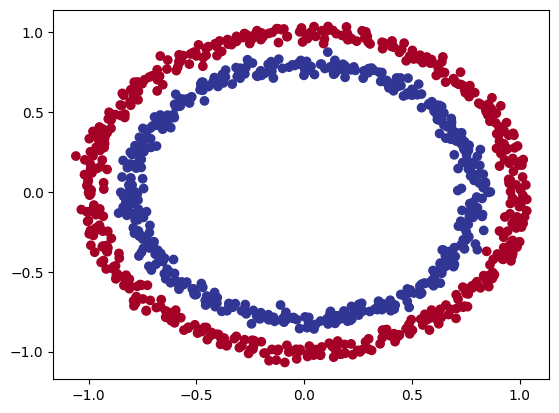

In [5]:
#visualize this with a plot

import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y,cmap = plt.cm.RdYlBu)

**Learning Tip :**

Before pushing forward, spend 10-minutes playing around with [playground.tensorflow.](https://playground.tensorflow.org/)org building and running different neural networks. See what happens when you change different hyperparameters.


In [6]:
#Input and Output shapes of our neural networks

X.shape, y.shape

((1000, 2), (1000,))

In [7]:
#Check how many samples we are working with
len(X), len(y)

(1000, 1000)

In [8]:
#View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [9]:
import tensorflow as tf

tf.__version__

'2.14.0'

**STEPS IN MODELING WITH TENSORFLOW:**

* Now we are working with binary classification here in this case
* Create the model
* Compile the model
* Fit the model
* Evaluate the model
* Tweak
* Evaluate





In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)


Epoch 1/5
32/32 [==============================] - 2s 4ms/step - loss: 5.6920 - accuracy: 0.4790
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 4.7797 - accuracy: 0.4610
Epoch 3/5
32/32 [==============================] - 0s 7ms/step - loss: 4.3675 - accuracy: 0.4680
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 2.2053 - accuracy: 0.4980
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7099 - accuracy: 0.5060


In [11]:
#Let's try and improve our model for longer and see

model_1.fit(X, y, epochs = 200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are working on binary classification problem and our model is getting around 50% accuracy, it's performing as if it's guessing

so let's step things up a notch and add extra layer

In [12]:
# Set random seee
tf.random.set_seed(42)

#1. Create Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less



In [13]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932734847068787, 0.5]

**Improving the model**

Let's look in to our bag of trics to improve our model

1. Create Model  - Add more layers and increase or decrease and increase the hidden units
2. Compile a model - Can change the SGD() to Adam
3. Fitting a model - Train for more time, increase the number of epochs




In [14]:
#Setting the random seed
tf.random.set_seed(42)

#1. Create Model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

#3. Fit the Model
model_3.fit(X,y, epochs = 100, verbose = 0)

In [15]:
#4. Evaluate the model
model_3.evaluate(X,y)     # still 50% accuracy we are getting the output


32/32 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.5090


[0.69891357421875, 0.5090000033378601]

In [16]:
model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


array([[0.48060966],
       [0.57197213],
       [0.5766576 ],
       [0.5749189 ],
       [0.44638705],
       [0.579543  ],
       [0.5562628 ],
       [0.47552508],
       [0.48982066],
       [0.57346904],
       [0.5315182 ],
       [0.5215267 ],
       [0.56415576],
       [0.4549176 ],
       [0.45117152],
       [0.46861762],
       [0.5596394 ],
       [0.4724365 ],
       [0.56375325],
       [0.52188325],
       [0.49906832],
       [0.59321314],
       [0.4708147 ],
       [0.48376   ],
       [0.59611285],
       [0.585563  ],
       [0.54578   ],
       [0.45770037],
       [0.46427697],
       [0.45341372],
       [0.49370074],
       [0.57856137],
       [0.55392903],
       [0.45436358],
       [0.4716981 ],
       [0.5995093 ],
       [0.5800671 ],
       [0.5229459 ],
       [0.46492624],
       [0.5007509 ],
       [0.51768476],
       [0.53901327],
       [0.52958417],
       [0.45303684],
       [0.5417854 ],
       [0.55766845],
       [0.451837  ],
       [0.539

To visualize our model predictions, let's create a function 'plot_decision_boundary()', this function will

* Take in the trained model, features(X), and abels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones(Where each unique class falls)



In [17]:
import numpy as np

In [20]:

import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 4ms/step
doing binary classifcation...


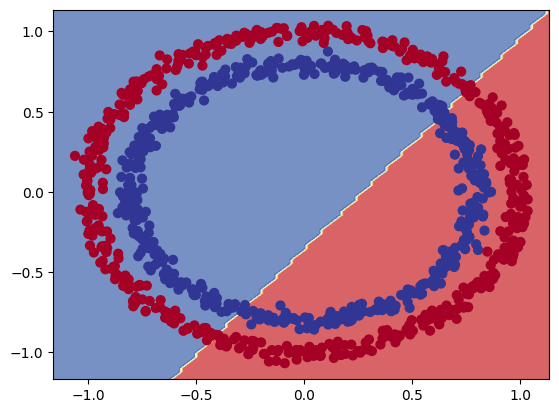

In [21]:
# Check out the predictions our model is making
plot_decision_boundary(model = model_3,
                       X=X,
                       y=y)